# Human Resources Analytics - Milestone Report

## Business Problem:
A million dollar company's CEO wants to know why his employees are leaving.

## Client:
The CEO of the Company

## Objective: 
My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.

## Part 1: Obtaining the Data

In [2]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

## Part 2: Cleaning the Data

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [5]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# Renaming certain columns for better readability
df = df.rename(columns={'last_evaluation': 'evaluation',
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [8]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## Part 3: Exploratory Data Analysis

### a. Statistical Overview
The dataset has:

1. About 15,000 employee observations and 10 features 
2. The company had a turnover rate of about 24%
3. Mean satisfaction of employees is 0.61

In [9]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [10]:
# Check the type of our features. 
df.dtypes

turnover                   int64
satisfaction_level       float64
evaluation               float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
Work_accident              int64
promotion                  int64
department                object
salary                    object
dtype: object

In [11]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [12]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [13]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### b. Correlation Matrix & Heatmap

**Highly correlated features:**

1. (+) projectCount & averageMonthlyHours & evaluation
2. (-) turnover & satisfaction

**Questions:**

1. What features affect our target variable the most (turnover)?
2. What features have strong correlations with each other?
3. Can we do a more in depth examination of these features?

**Summary:**
From the heatmap, there seems to be heavy **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
project_count,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_monthly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
years_at_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


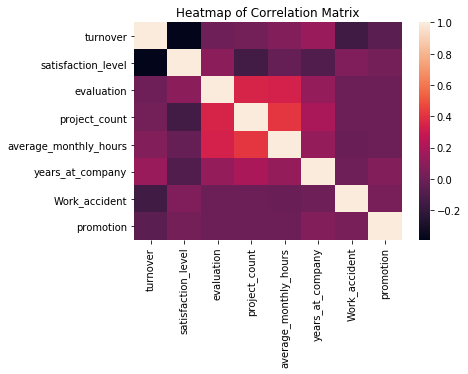

In [14]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

### c. Distribution Plots (Satisfaction - Evaluation - Average Monthly Hours)

**Summary**: Let's examine the distribution on some of the employee's features. Here's what I found:

* **Satisfaction** - There seems to be a huge spike for employees with low satisfaction and high satisfaction.
* **Evaluation** - There seems to be a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
* **AverageMonthlyHours** - There seems to be another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
* The evaluation and average monthly hour graphs both seem to share a similar distribution.
* Maybe employees with lower average monthly hours were evaluated less and vice versa.
* If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

**Questions:**
* Is there a reason for the high spike in low satisfaction of employees?
* Could employees be grouped in a way with these features?
* Is there a correlation between evaluation and averageMonthlyHours?

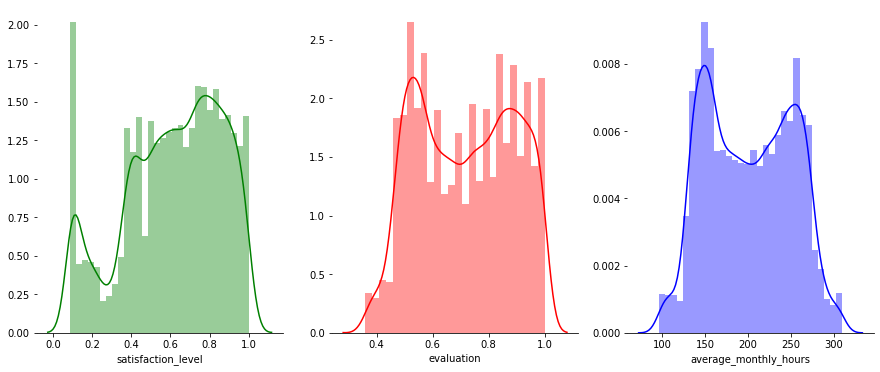

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.despine(left=True)

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=True, color="g", ax=axes[0])

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=True, color="r", ax=axes[1])

# Graph Employee Average Monthly Hours
sns.distplot(df.average_monthly_hours, kde=True, color="b", ax=axes[2])

### d. Salary V.S. Turnover

**Summary**: This is not unusual. Here's what I found:

* Majority of employees who left either had low or medium salary.
* Barely any employees left with high salary
* Employees with low to average salaries tend to leave the company.

**Questions:**
* What is the work environment like for low, medium, and high salaries?
* What made employees with high salaries to leave?

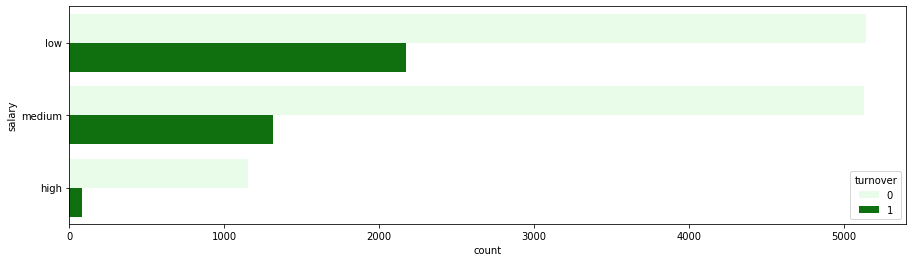

In [16]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df, color="g");

### e. Department V.S. Turnover


**Summary:** Let's see which department . Here's what I found:

* The sales, technical, and support department were the top 3 departments to have employee turnover
* The management department had the smallest amount of turnover

**Questions:**
If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

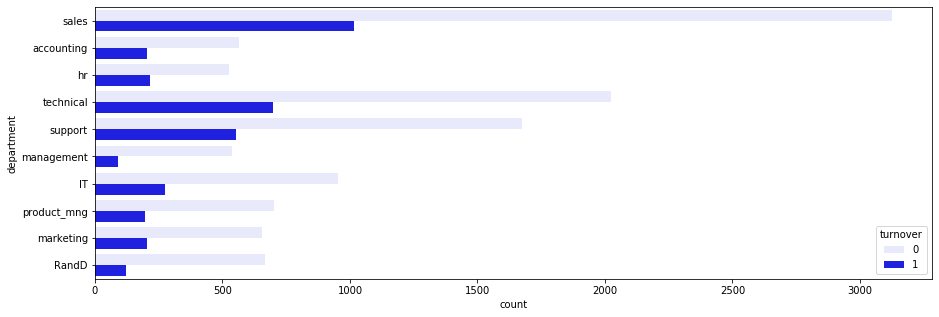

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df, color="b");

### f. Turnover V.S. ProjectCount

**Summary:** This graph is quite interesting as well. Here's what I found:

* More than half of the employees with 2,6, and 7 projects left the company
* Majority of the employees who did not leave the company had 3,4, and 5 projects
* All of the employees with 7 projects left the company
* There is an increase in employee turnover rate as project count increases

**Questions:**

* Why are employees leaving at the lower/higher spectrum of project counts?
* Maybe this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
* Maybe employees with 6+ projects are getting overworked, thus leaving the company?

[Text(0, 0.5, 'Percent')]

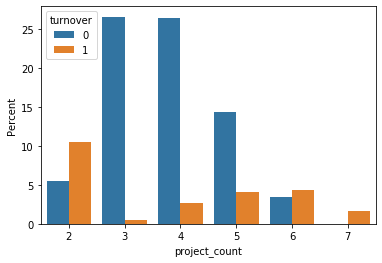

In [18]:
ax = sns.barplot(x="project_count", y="project_count", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

### g. Turnover V.S. Evaluation

**Summary:**

* There seems to be a biomodal distrubtion for those that had a turnover.
* Employees with low performance tend to leave the company more
* Employees with high performance tend to leave the company more
* The sweet spot seems for those that stayed seems to be within 0.6-0.8

Text(0.5, 1.0, 'Last evaluation')

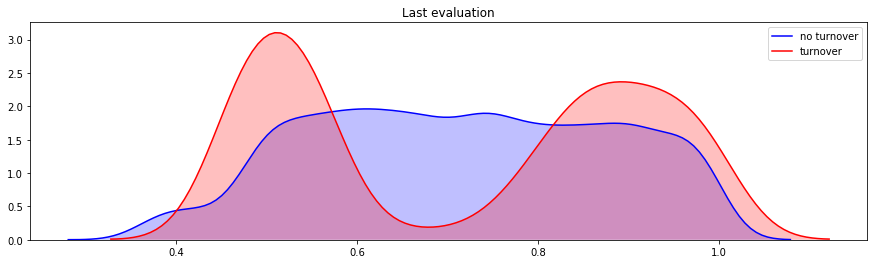

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

### h. Turnover V.S. AverageMonthlyHours

**Summary:**

* Another bi-modal distrubtion for employees that turnovered
* Employees who had less hours of work (~150hours or less) left the company more
* Employees who had too many hours of work (~250 or more) left the company
* Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Average monthly hours worked')

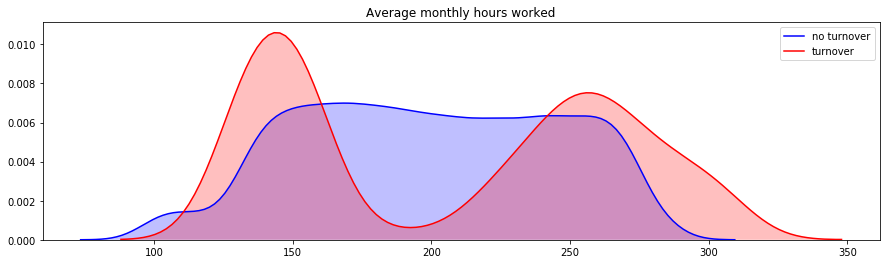

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'average_monthly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'average_monthly_hours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

### i. ProjectCount VS AverageMonthlyHours

**Summary:**

* As project count increased, so did average monthly hours
* Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
* Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
* In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

**Questions:**

* What could be the meaning for this?
* Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

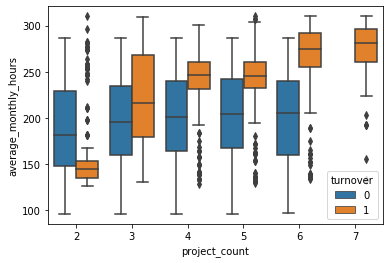

In [21]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month
sns.boxplot(x="project_count", y="average_monthly_hours", hue="turnover", data=df)

### j. ProjectCount VS Evaluation

**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There seems to be an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

**Questions:**

* Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count?
* Shouldn't employees with lower evaluations tend to leave the company more?

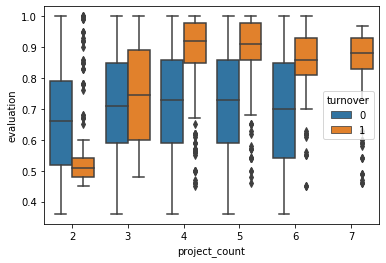

In [22]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
sns.boxplot(x="project_count", y="evaluation", hue="turnover", data=df)

### k. Satisfaction VS Evaluation

**Summary:** This is by far the most compelling graph. This is what I found:
* There is 3 distinct clusters for employees who left the company

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
* **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
* **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.
* **Question:** Could this cluser mean that employees left because they found another job opportunity?

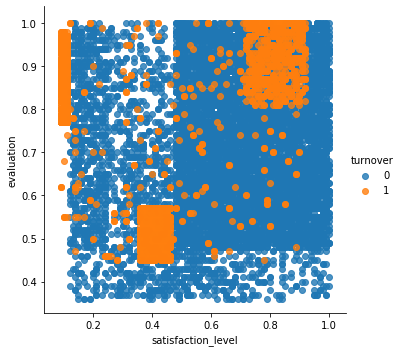

In [23]:
sns.lmplot(x='satisfaction_level', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

### l) Turnover VS Years at company

**Summary:** Let's see if theres a point where employees start leaving the company. Here's what I found:

* More than half of the employees with 4 and 5 years left the company
* Employees with 5 years should highly be looked into

**Questions:**
* Why are employees leaving mostly at the 3-5 year range?
* Who are these employees that left?
* Are these employees part-time or contractors?

[Text(0, 0.5, 'Percent')]

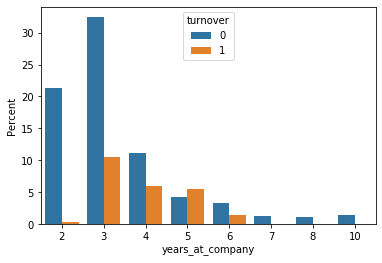

In [26]:
ax = sns.barplot(x="years_at_company", y="years_at_company", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

### m) K-Means Clustering of Employee Turnover

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee

**Cluster 3 (Green):** Hard-working and Happy Employee

**Clustering Problem:**

* How do we know that there are "3" clusters?
* We would need expert domain knowledge to classify the right amount of clusters
* Hidden uknown structures could be present

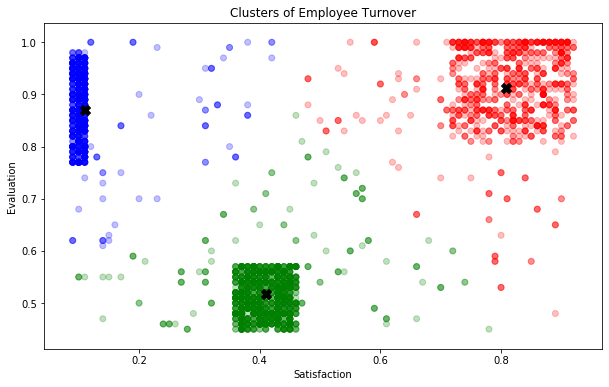

In [28]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction_level","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

## Part 4: Data Modeling

The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was Random Forest!

#### Base Rate

* A **Base Rate Model** is a model that always selects the target variable's majority class. It's just used for reference to compare how better another model is against it. In this dataset, the majority class that will be predicted will be 0's, which are employees who did not leave the company.
* If you recall back to Part 3: Exploring the Data, 24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's.
* Example: The base rate accuracy for this data set, when classifying everything as 0's, would be 76% because 76% of the dataset are labeled as 0's (employees not leaving the company).

#### Model Evaluation 

**Precision and Recall / Class Imbalance**

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down.

In this case, evaluating our model’s algorithm based on **accuracy** is the **wrong** thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: False Positive and False Negative errors.

**False Positives (Type I Error):** You predict that the employee will leave, but do not

**False Negatives (Type II Error):** You predict that the employee will not leave, but does leave

In this problem, what type of errors do we care about more? False Positives or False Negatives?

#### Different Ways to Evaluate Classification Models

* Predictive Accuracy: How many does it get right?
* Speed: How fast does it take for the model to deploy?
* Scalability: Can the model handle large datasets?
* Robustness: How well does the model handle outliers/missing values?
* Interpretability: Is the model easy to understand?


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection

In [30]:
department = pd.get_dummies(data=df['department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],drop_first=True,prefix='sal')
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [31]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [38]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42, stratify=y)

In [34]:
#Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [35]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.80


In [37]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC: 0.827 (0.010)


### Logistic Regression VS Random Forest VS Decision Tree VS AdaBoost Model

In [41]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [40]:
print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.79
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1714
           1       0.52      0.80      0.63       536

    accuracy                           0.78      2250
   macro avg       0.72      0.79      0.73      2250
weighted avg       0.83      0.78      0.79      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1714
           1       0.93      0.91      0.92       536

    accuracy                           0.96   

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1714
           1       1.00      0.95      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.99      0.99      0.99      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.91      0.89      0.90       536

    accuracy                           0.95      2250
   macro avg       0.94      0.93      0.94      2250
weighted avg       0.95      0.95      0.95      2250



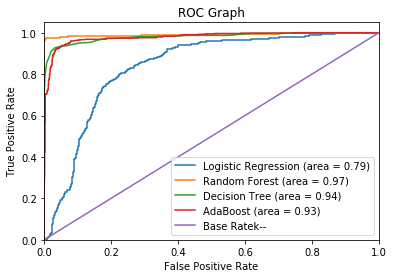

In [42]:
# ROC graph
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Feature Importance

**Top 3 Features:**

1. Satisfaction
2. YearsAtCompany
3. Evaluation

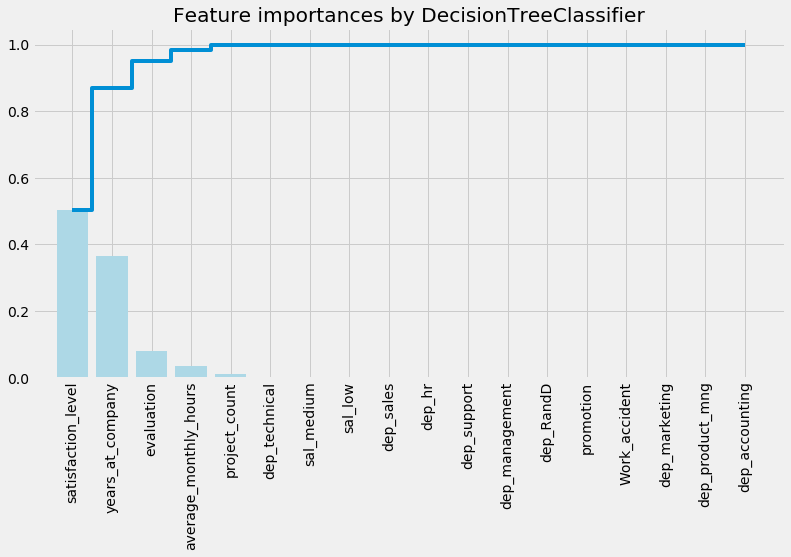

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### Visualizing the Decision Tree Model

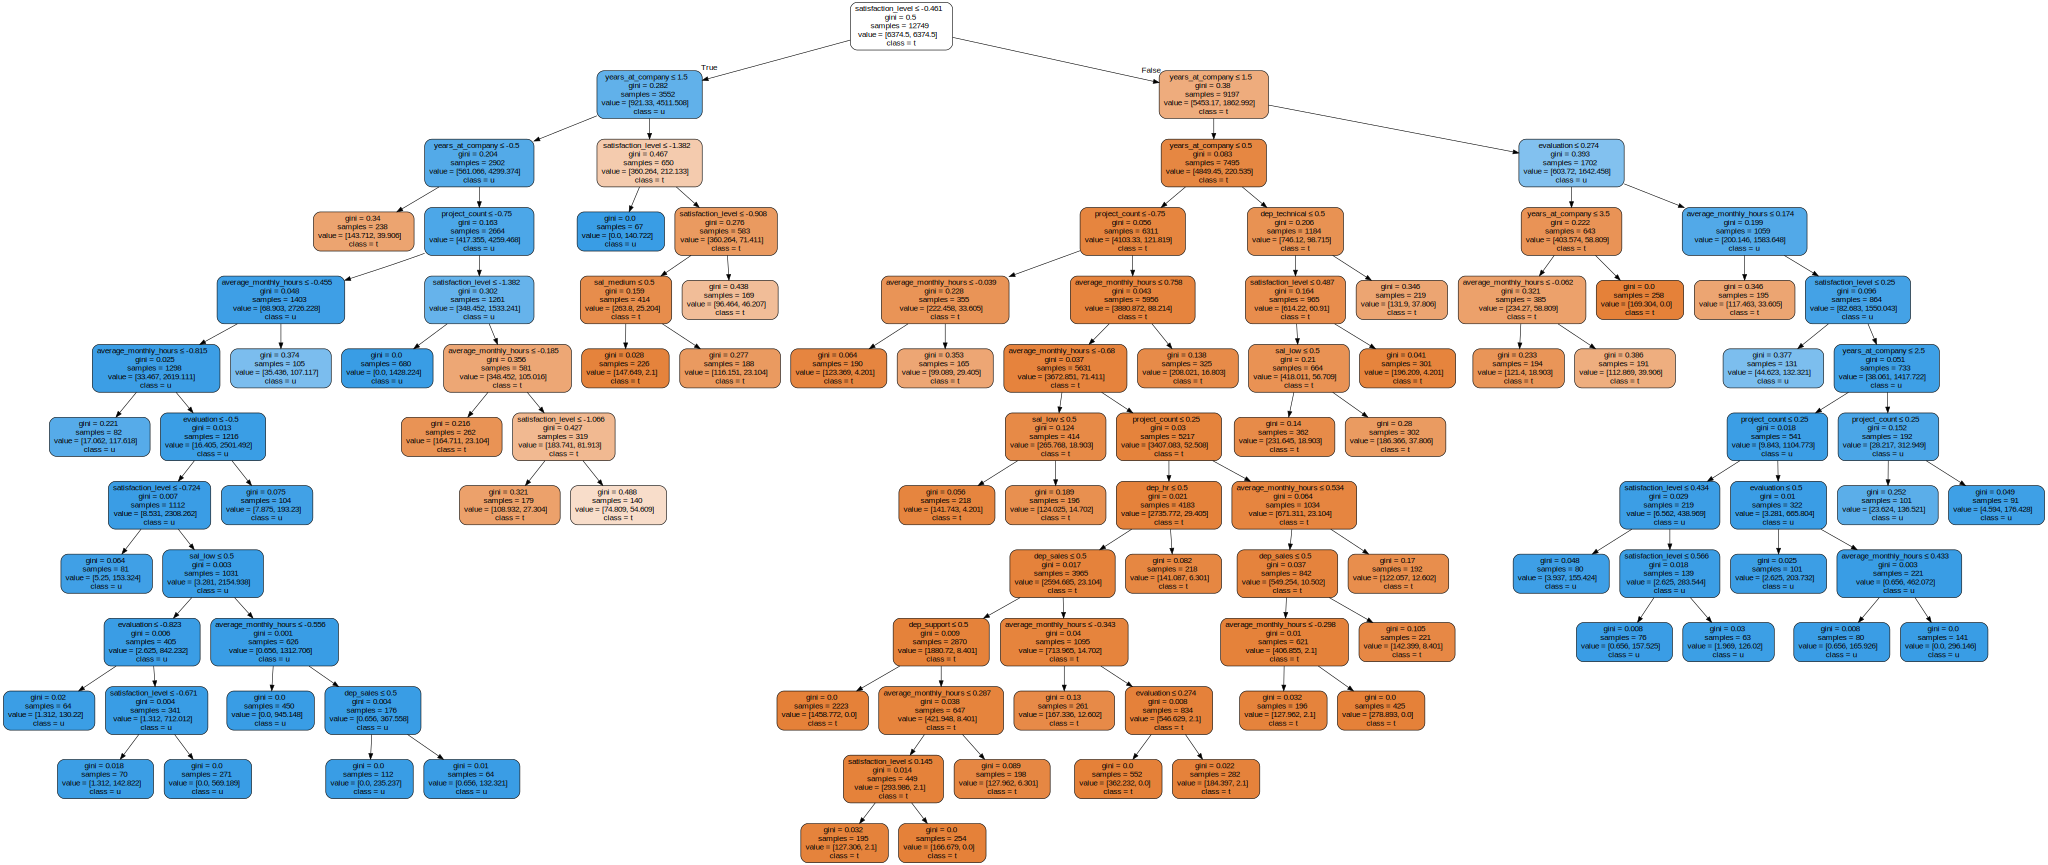

In [50]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Employee Turnover") 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feat_names,  
                         class_names='turnover',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Part 5: Interpreting the Data

**Summary:** With all of this information, this is what CEO should know about his company and why his employees probably left:

1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
4. Employees with **low to medium salaries** are the bulk of employee turnover
5. Employees that had **2,6, or 7** project count was at risk of leaving the company
6. Employee **satisfaction is the highest indicator for employee turnover**.



#### Potential Solution 
**Binary Classification:** Turnover V.S. Non Turnover

**Instance Scoring:** Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application:** Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

**Solution 1:** 
* We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
* We can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

* Be a good coach
* Empower the team and do not micromanage
* Express interest for team member success
* Have clear vision / strategy for team
* Help team with career development